In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib

## Flight PRG-WAW

In [4]:
fto = '/storage/experiments/2023/04_HIMAC/PRG_WAW'

## Load and plot data from LABDOS

In [5]:
print (fto)

ID = '/LABDOS_EF'
#ID = '/LABDOS_D9'
#ID = '/LABDOS_B8'
#ID = '/LABDOS_20'
#ID = '/LABDOS_8B'
#ID = '/LABDOS_4E'

data = {
    'EF': {
        'ID': '/LABDOS_EF'
    },
    'D9': {
        'ID': '/LABDOS_D9'
    },
    'B8': {
        'ID': '/LABDOS_B8'
    },
    '20': {
        'ID': '/LABDOS_20'
    },
    '8B': {
        'ID': '/LABDOS_8B'
    },
    '4E': {
        'ID': '/LABDOS_4E'
    },
}

for x in data:
    ID = data[x]['ID']
    l=[]
    #l.extend(range(0,258))
    #l.extend(range(0,260))
    l.extend(range(0,505))

    #df = pd.read_csv(fto+'/DATALOG.TXT', sep=',', header=None, names=l, comment='*', low_memory=False)
    df = pd.read_csv(fto+ID+'/0.TXT', sep=',', header=None, names=l, comment='*', low_memory=False)
    df = df.reset_index(drop=True)
    data[x]['df'] = df
    print(x, 'Loaded')

/storage/experiments/2023/04_HIMAC/PRG_WAW
EF Loaded
D9 Loaded
B8 Loaded
20 Loaded
8B Loaded
4E Loaded


In [6]:
for y in data:
    df = data[y]['df']
    #SWITCH_ON_TIMES = ['2021-9-18 12:00', '2021-9-19 12:00', '2021-9-20 12:00', '2021-9-21 12:00', '2021-9-22 12:00', '2021-9-23 12:00', '2021-9-24 12:00', '2021-9-25 12:00', '2021-9-26 12:00', '2021-9-27 12:00', '2021-9-28 12:00', '2021-9-29 12:00', '2021-9-30 12:00']
    SWITCH_ON_TIMES = ['2023-04-22 7:44']
    #SWITCH_ON_TIMES = ['2023-03-12 18:09']

    df[2] = df[2].apply(pd.to_numeric, errors='coerce')

    df['runtime'] = np.nan
    df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
    df.loc[df[0]=='$DOS','seconds'] = 0
    df['runtime'] = df['seconds'].diff() * -1
    rc = df.copy()
    #rc = df.iloc[366870:378082,:].copy()
    #rc = df.iloc[366683:378082,:].copy()
    #rc = df.iloc[366714:378084,:].copy() 

    run = 0
    rc['run'] = np.nan

    try:
        for x in rc.loc[rc[0]=='$DOS'].index:
            rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
            run += 1
    except:
        pass
    rc['run'].fillna(method="ffill", inplace=True)

    pd.set_option('display.max_rows', rc.shape[0]+1)
    print(rc.loc[rc[0]=='$DOS'][[0,1,2,3,4, 'run', 'runtime']])
    #print(rc.loc[rc[0]=='$AIRDOS'][[0,1, 'runtime']])
    pd.set_option('display.max_rows', 10)

    #!!!rc = rc.loc[rc[0]=='$HIST']
    #rc = rc.iloc[949:]
    #rc = rc.iloc[3280:]
    
    rc[2] = pd.to_numeric(rc[2])
    rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
    rc.set_index(rc['time'], drop=False, inplace=True)
    
    data[y]['rc'] = rc

      0          1   2    3                                         4  \
0  $DOS  LABDOS01A NaN  514  71cdf196883fa3ab648ae47327ef2137eb69420f   
3  $DOS  LABDOS01A NaN  514  71cdf196883fa3ab648ae47327ef2137eb69420f   
7  $DOS  LABDOS01A NaN  514  71cdf196883fa3ab648ae47327ef2137eb69420f   

               run  runtime  
0  2023-04-22 7:44      NaN  
3  2023-04-22 7:44    22.26  
7  2023-04-22 7:44    33.47  
       0          1   2    3                                         4  \
0   $DOS  LABDOS01A NaN  511  71cdf196883fa3ab648ae47327ef2137eb69420f   
8   $DOS  LABDOS01A NaN  511  71cdf196883fa3ab648ae47327ef2137eb69420f   
10  $DOS  LABDOS01A NaN  511  71cdf196883fa3ab648ae47327ef2137eb69420f   
11  $DOS  LABDOS01A NaN  511  71cdf196883fa3ab648ae47327ef2137eb69420f   

                run  runtime  
0   2023-04-22 7:44      NaN  
8   2023-04-22 7:44    76.54  
10  2023-04-22 7:44    11.30  
11  2023-04-22 7:44    -0.00  
      0          1   2    3                                  

# Load and plot telemetry data

In [7]:
#ftt = glob.iglob(fto+"/*/*.csv") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/*.csv") # generator, search immediate subdirectories 
tele = pd.DataFrame()
for f in ftt:
    print(f)
    tele = pd.concat([tele, pd.read_csv(f)])
#tele

/storage/experiments/2023/04_HIMAC/PRG_WAW/LO524_2ffeb0e8.csv


Text(0, 0.5, 'Altitude a.s.l. [ft]')

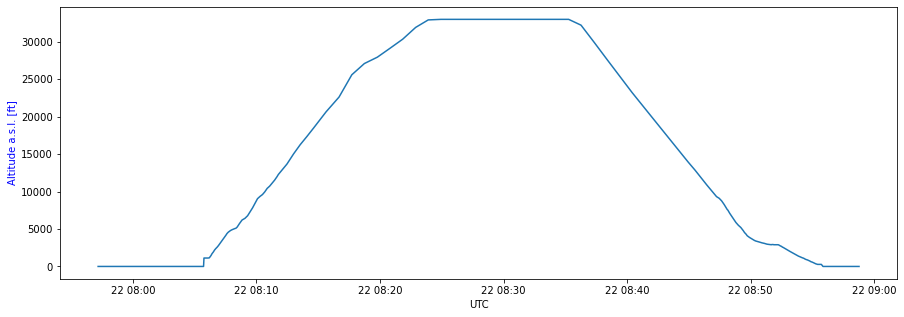

In [8]:
plt.figure(figsize=(15,5))

tele['time'] = pd.to_datetime(tele['UTC'], format='%Y-%m-%dT%H:%M:%SZ')
tele.set_index('time', inplace=True)
tele.sort_index(inplace=True)
plt.plot(tele['Altitude'])
plt.xlabel('UTC')
plt.ylabel('Altitude a.s.l. [ft]', color='blue')

In [18]:
#tele
#rc

## Contact and filter data from ADSB and LABDOS into dataframe

In [13]:
for x in data:
    rc = data[x]['rc']
    let = pd.concat([rc[(rc[0] == '$HIST')].drop(columns=['time']), tele]).sort_values(by='time')
    for y in ['Altitude', 'Speed', 'Direction', 'Timestamp', 'UTC']:
        let[y] = let[y].interpolate(limit_direction='both')

    let = let[(let[0] == '$HIST')]
    data[x]['let'] = let

## Plot altitude vs flux

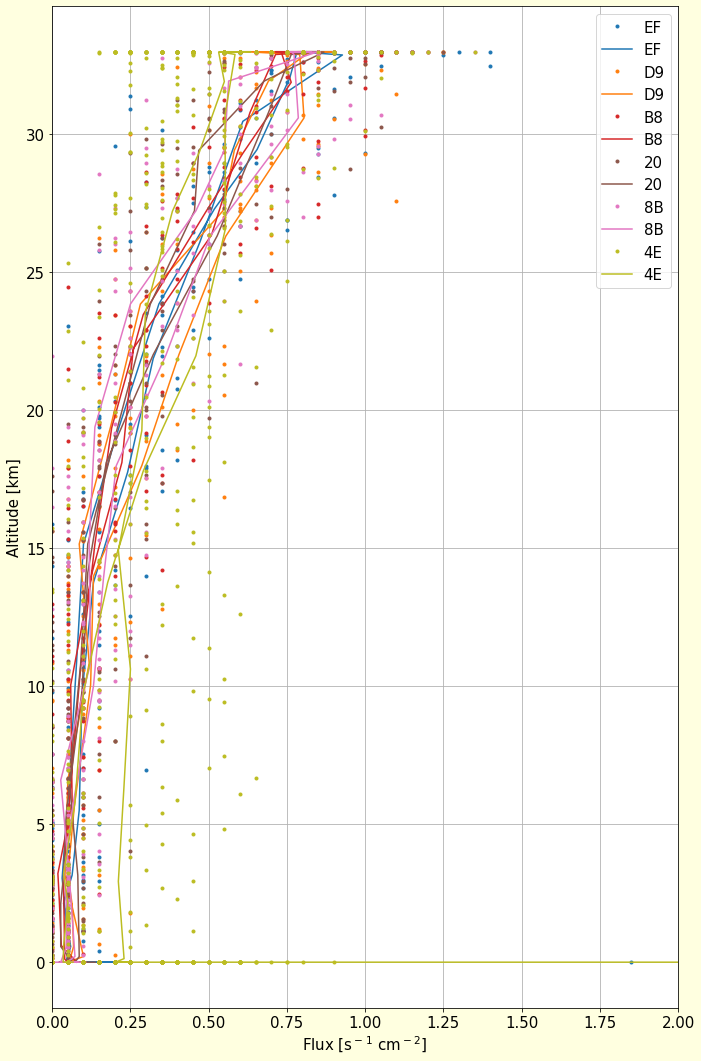

In [21]:
FIRST_CHANNEL = 9

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,15), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for i, x in enumerate(data):
#for i, x in enumerate(['EF']):
    
    
    cmap = matplotlib.cm.get_cmap('tab10')
    color = cmap(i/len(data))
    
    let = data[x]['let']
    let['sum'] = let[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2

    plt.plot(let['sum'], let['Altitude']/1000, '.', color=color, label=x)
    rcc = let.resample('2T').mean()
    plt.plot(rcc['sum'], rcc['Altitude']/1000, '-', color=color, label=x)
    
plt.ylabel("Altitude [km]")
plt.xlabel("Flux [s$^-$$^1$ cm$^-$$^2$]")
plt.xlim(0, 2)
plt.legend()
plt.grid()
plt.tight_layout()

# CombiplotAIRDOS and telemetry data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


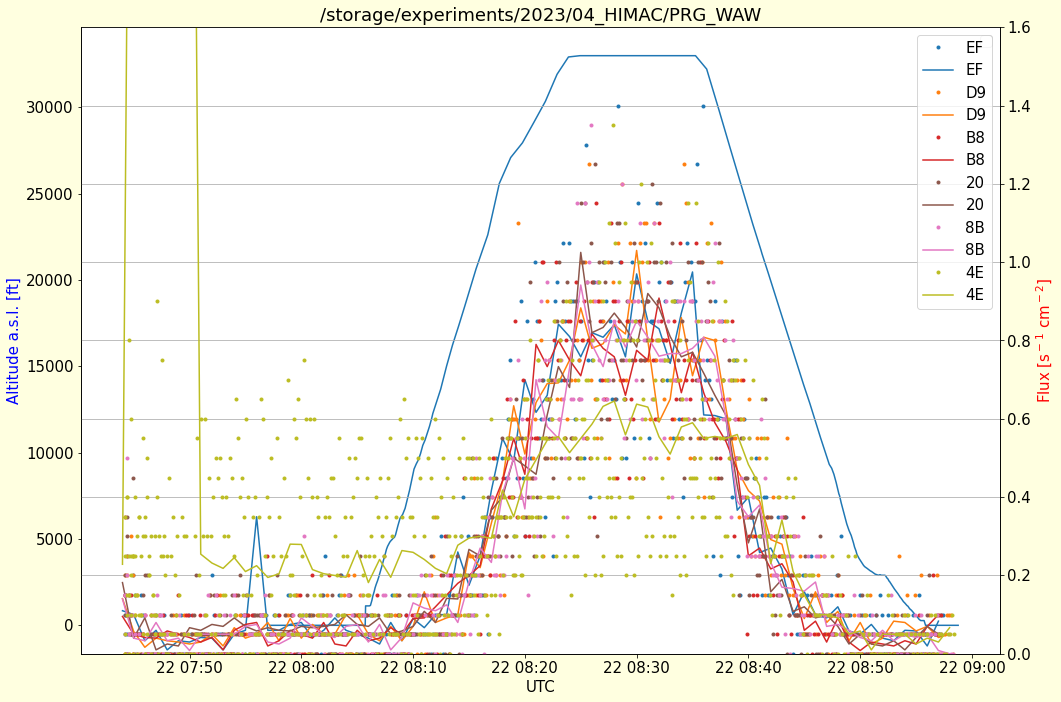

In [170]:
FIRST_CHANNEL = 9

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'])#, label=str(rc.loc[rc[0]=='$DOS'][[4]].iloc[0,0]))
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')
plt.legend()
#rc = rc.iloc[3286:]

plt.twinx()

for i, x in enumerate(data):
    import matplotlib
    cmap = matplotlib.cm.get_cmap('tab10')
    color = cmap(i/len(data))
    
    rc = data[x]['rc']
    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2
    #rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

    rc['sum'].plot(marker='.', linestyle='', label=x, color=color)
    rcc = rc.resample('1T').mean()
    rcc['sum'].plot(label=x, color=color)
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)
plt.legend()
plt.ylim([0,1.6]) 
plt.tight_layout()
plt.grid()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


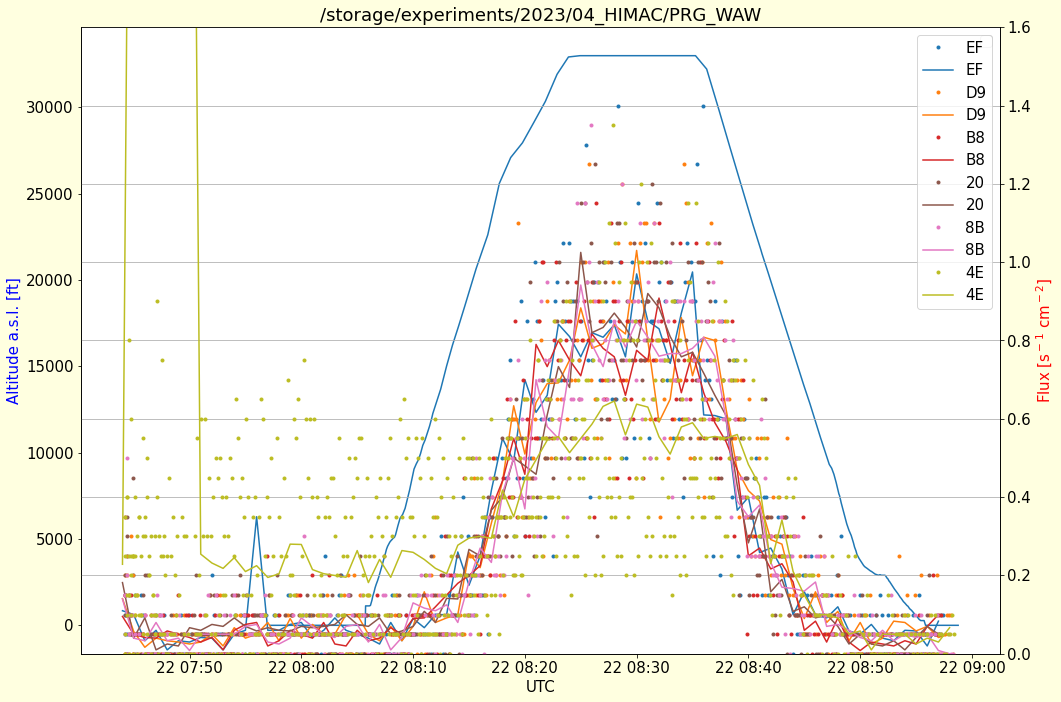

In [171]:
FIRST_CHANNEL = 9

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'])#, label=str(rc.loc[rc[0]=='$DOS'][[4]].iloc[0,0]))
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')
plt.legend()
#rc = rc.iloc[3286:]

plt.twinx()

for i, x in enumerate(data):
    import matplotlib
    cmap = matplotlib.cm.get_cmap('tab10')
    color = cmap(i/len(data))
    
    rc = data[x]['rc']
    rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/10/2
    #rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

    rc['sum'].plot(marker='.', linestyle='', label=x, color=color)
    rcc = rc.resample('1T').mean()
    rcc['sum'].plot(label=x, color=color)
    
    plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
    plt.title(fto)
    plt.legend()
    plt.ylim([0,1.6]) 
    plt.tight_layout()
    plt.grid()

In [70]:
#rc
rc

0          1        2      3  \
time                                                        
NaT                       $DOS  LABDOS01A      NaN    517   
2023-04-22 07:45:11.400  $HIST          0    11.40  21768   
2023-04-22 07:45:22.260  $HIST          1    22.26  21735   
2023-04-22 07:45:33.470  $HIST          2    33.47  21806   
2023-04-22 07:45:44.390  $HIST          3    44.39  21781   
...                        ...        ...      ...    ...   
2023-04-22 08:58:38.800  $HIST        402  4418.80  21898   
2023-04-22 08:58:49.950  $HIST        403  4429.95  21873   
2023-04-22 08:59:01.900  $HIST        404  4441.90  21895   
2023-04-22 08:59:12.230  $HIST        405  4452.23  21890   
2023-04-22 08:59:23.380  $HIST        406  4463.38  21902   

                                                                4     5  \
time                                                                      
NaT                      4f134b6a9c2645fd21489f2ea65bf4ee99cb9cfa  User   
2023-04-22 07:45:11.400                                         0  1226   
2023-04-22 07:45:22.260                                         2  1256   
2023-04-22 07:45:33.470                                         5  1053   
2023-04-22 07:45:44.390                                         4  1219   
...                                                           ...   ...   
2023-04-22 08:58:38.800                                         0  1232   
2023-04-22 08:58:49.950                                         1  1370   
2023-04-22 08:59:01.900                                         1   871   
2023-04-22 08:59:12.230                                         2   870   
2023-04-22 08:59:23.380                                         1  1233   

                                                        6       7    8    9  \
time                                                                          
NaT                      1290c00806a20090344aa000a000004e     NaN  NaN  NaN   
2023-04-22 07:45:11.400                             20209  2879.0  1.0  0.0   
2023-04-22 07:45:22.260                             20125  2965.0  0.0  0.0   
2023-04-22 07:45:33.470                             20238  2979.0  2.0  0.0   
2023-04-22 07:45:44.390                             20270  2809.0  0.0  0.0   
...                                                   ...     ...  ...  ...   
2023-04-22 08:58:38.800                             20711  2242.0  0.0  0.0   
2023-04-22 08:58:49.950                             20774  2065.0  0.0  0.0   
2023-04-22 08:59:01.900                             20359  2957.0  0.0  0.0   
2023-04-22 08:59:12.230                             20345  2976.0  0.0  1.0   
2023-04-22 08:59:23.380                             20689  2258.0  0.0  1.0   

                         ...  500  501  502  503  504  runtime  seconds  \
time                     ...                                              
NaT                      ...  NaN  NaN  NaN  NaN  NaN      NaN     0.00   
2023-04-22 07:45:11.400  ...  0.0  0.0  0.0  0.0  0.0   -11.40    11.40   
2023-04-22 07:45:22.260  ...  0.0  0.0  0.0  0.0  0.0   -10.86    22.26   
2023-04-22 07:45:33.470  ...  0.0  0.0  0.0  0.0  0.0   -11.21    33.47   
2023-04-22 07:45:44.390  ...  0.0  0.0  0.0  0.0  0.0   -10.92    44.39   
...                      ...  ...  ...  ...  ...  ...      ...      ...   
2023-04-22 08:58:38.800  ...  0.0  0.0  0.0  0.0  0.0   -11.14  4418.80   
2023-04-22 08:58:49.950  ...  0.0  0.0  0.0  0.0  0.0   -11.15  4429.95   
2023-04-22 08:59:01.900  ...  0.0  0.0  0.0  0.0  0.0   -11.95  4441.90   
2023-04-22 08:59:12.230  ...  0.0  0.0  0.0  0.0  0.0   -10.33  4452.23   
2023-04-22 08:59:23.380  ...  0.0  0.0  0.0  0.0  0.0   -11.15  4463.38   

                                     run                    time  sum  
time                                                                   
NaT                      2023-04-22 7:45                     NaT  0.0  
2023-04-22 07:45:11.400  2023-04-22 7:4

0.034 0.016


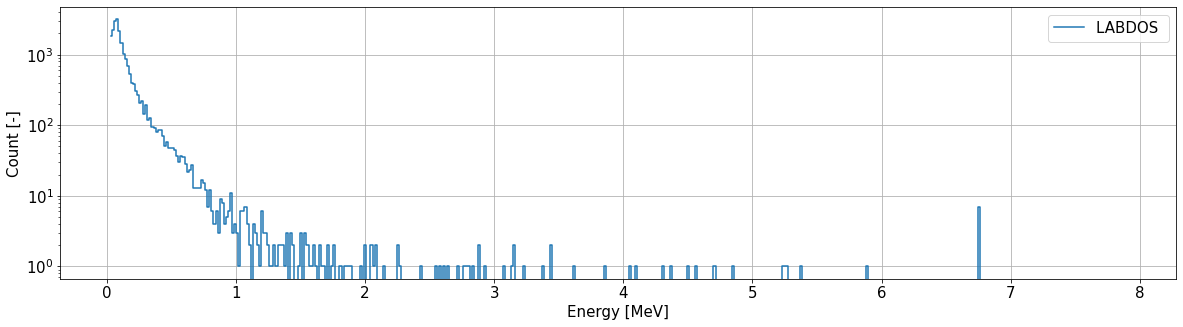

In [9]:
ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS ', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

0.034 0.016


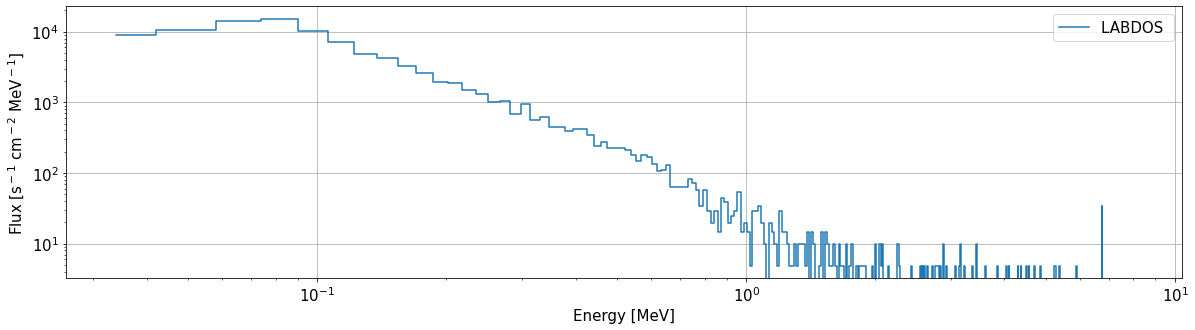

In [12]:
rc.iloc[:,8:500]
#e3.loc[8:499]
e3

1    i      x
8    1838.0    8  0.034
9    2198.0    9  0.050
10   2949.0   10  0.066
11   3155.0   11  0.082
12   2125.0   12  0.098
..      ...  ...    ...
495     0.0  495  7.826
496     0.0  496  7.842
497     0.0  497  7.858
498     0.0  498  7.874
499     0.0  499  7.890

[492 rows x 3 columns]

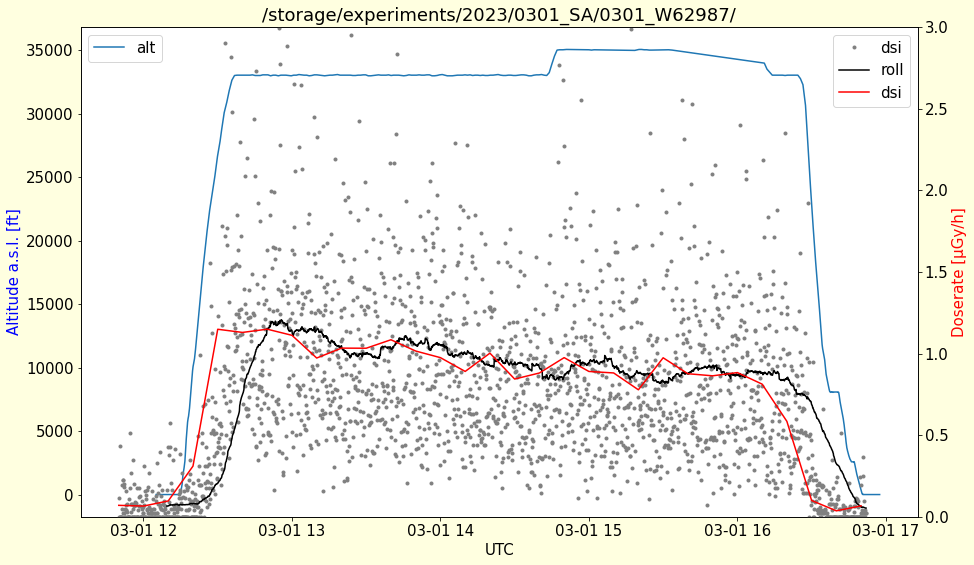

In [26]:
FIRST_CHANNEL = 8

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'], label='alt')
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

#rc = rc.iloc[3286:]
plt.legend(loc=2)

plt.twinx()

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)
rc['ener'] = (np.asarray(rc.iloc[:,8:500]) * np.asarray(e3.loc[8:499,'x'])).sum(axis=1)    
rc['dsi'] = ((1e6 * (1.602e-19 * rc['ener'] * 1e6)/0.1398e-3)/6.88) * 3600 #* 2.45 * 1.048#* 1.1 #1.094#2.71 # in uGy/h


rc['dsi'].plot(marker='.', linestyle='', color='gray')
rc['roll'] = rc['dsi'].rolling(150).mean()
rc['roll'].plot(color='black')
rcc = rc.resample('10T').mean()
rcc['dsi'].plot(color='red')
plt.ylabel('Doserate [µGy/h]', color='red')
plt.title(fto)
#plt.yscale('log')

plt.ylim([0,3]) 
plt.legend(loc=1)


/tmp/ipykernel_7839/1754771637.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcc['sum'] = rcc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2


Text(0, 0.5, 'Flux [s$^-$$^1$ cm$^-$$^2$]')

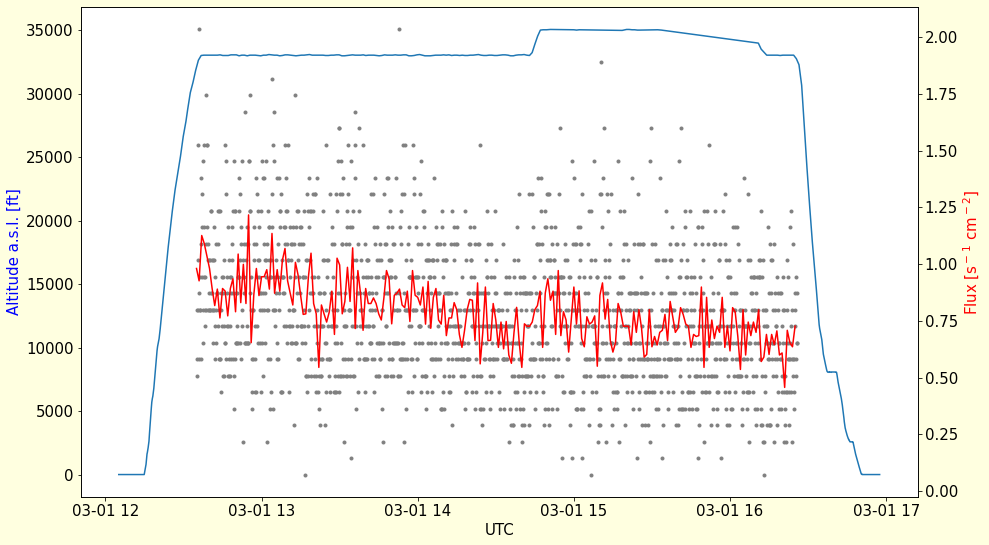

In [32]:
FIRST_CHANNEL = 8

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'])
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

rcc = rc.loc['2023-03-1 12:35':'2023-03-1 16:25']

plt.twinx()

rcc['sum'] = rcc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

rcc['sum'].plot(marker='.', linestyle='', color='gray')
rccc = rcc.resample('1T').mean()
rccc['sum'].plot(color='red')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')

#plt.ylim([0,30]) 


0.034 0.016


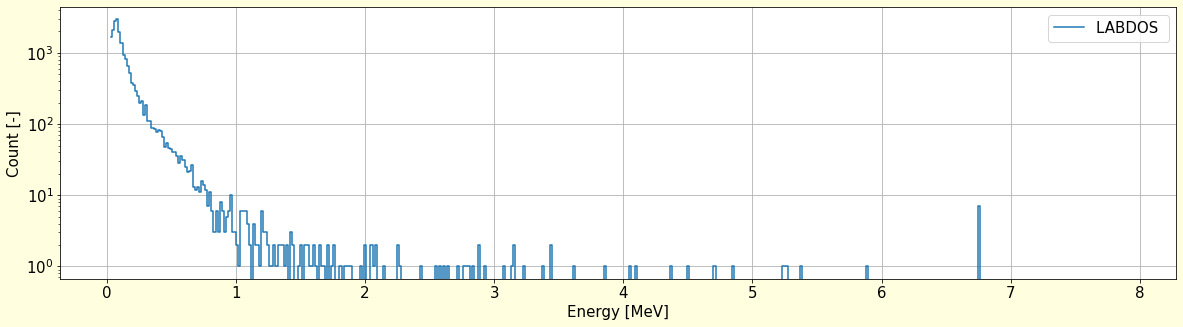

In [13]:
ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS ', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

0.034 0.016


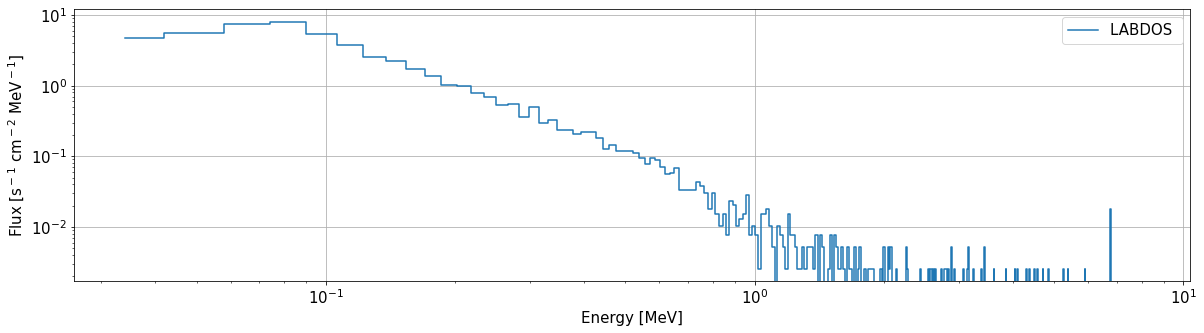

In [36]:
ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0] 
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(e3['x'], e3['1'] / 2 / measurement_duration / coef3[1], label='LABDOS ', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$ MeV$^-$$^1$]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

In [33]:
print('The first measurement', rcc.iloc[0,1])
print('The last measurement', rcc.iloc[-1,1])
measurement_duration = (int(rcc.iloc[-1,1]) - int(rcc.iloc[0,1])) * 6.88
flight_duration = rcc.iloc[-1,2] - rcc.iloc[0,2]
print('Begin', rcc.iloc[0,2], 's')
print('End', rcc.iloc[-1,2], 's')
print('Flight duration', round(flight_duration,2), 's')
print('Measurement duration', measurement_duration, 's')
deathtime_ratio = flight_duration / measurement_duration
print('Deathtime ratio', round(deathtime_ratio,2))

e3['total'] = e3['1']*e3['x']
depener = e3['total'].sum()*deathtime_ratio
print('Deposited Energy including deathtime', round(depener,2), 'MeV')
dose = (1e6*(1.602e-19 * depener*1e6)/0.1398e-3) 

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# 0.1398e-3 kg
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uGy/h

print('Dose in silicon', round(dose,2), 'µGy')


The first measurement 346
The last measurement 2125
Begin 2700.27 s
End 16554.1 s
Flight duration 13853.83 s
Measurement duration 12239.52 s
Deathtime ratio 1.13
Deposited Energy including deathtime 3416.34 MeV
Dose in silicon 3.91 µGy


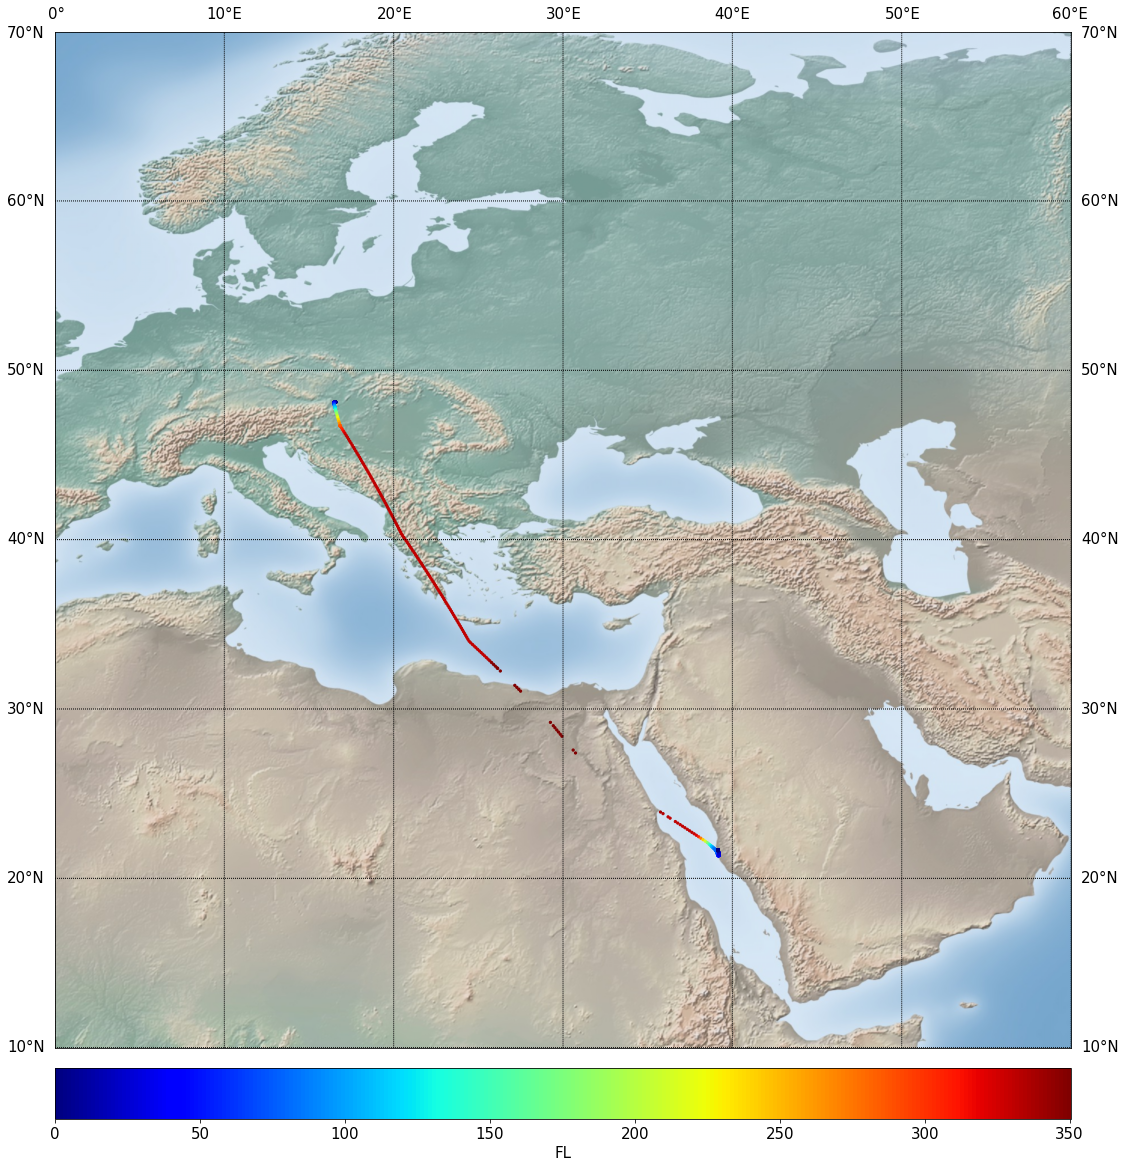

In [15]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import urllib, os

tele['lat'] = tele['Position'].str.split(',').str[0]
tele['lon'] = tele['Position'].str.split(',').str[1]
tele.lon = pd.to_numeric(tele.lon)
tele.lat = pd.to_numeric(tele.lat)
tele.Altitude = pd.to_numeric(tele.Altitude)


plt.figure(figsize=(20,20))
plt.tight_layout()

matplotlib.rcParams.update({'font.size': 15})

# create Basemap instance.
#m = Basemap(projection='kav7',lon_0=0)
m = Basemap(projection='cyl',lon_0=0, llcrnrlon=0,llcrnrlat=10,urcrnrlon=60,urcrnrlat=70)
#m = Basemap(projection='robin',lon_0=0)
#m = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=85,projection='mill')


x, y = m(tele.lon.tolist(),tele.lat.tolist())
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,+90.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,1,0])
m.shadedrelief()

im1 = m.scatter(x,y,c=(tele.Altitude/100).tolist(),marker='.', s = 20, cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('FL')

#plt.clim(0, 12500)  # limit for color axis
plt.show()                


In [38]:
cari_photons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_photons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_photons.reset_index(drop=True, inplace=True)
cari_photons['time'] = pd.to_datetime(dict(year=cari_photons[6], month=cari_photons[7], day=cari_photons[8], hour=cari_photons[9], minute=cari_photons[10]))
cari_photons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [39]:
cari_electrons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_electrons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_electrons.reset_index(drop=True, inplace=True)
cari_electrons['time'] = pd.to_datetime(dict(year=cari_electrons[6], month=cari_electrons[7], day=cari_electrons[8], hour=cari_electrons[9], minute=cari_electrons[10]))
cari_electrons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [46]:
cari_protons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_protons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_protons.reset_index(drop=True, inplace=True)
cari_protons['time'] = pd.to_datetime(dict(year=cari_protons[6], month=cari_protons[7], day=cari_protons[8], hour=cari_protons[9], minute=cari_protons[10]))
cari_protons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [58]:
cari_alphas = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_alphas.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_alphas.reset_index(drop=True, inplace=True)
cari_alphas['time'] = pd.to_datetime(dict(year=cari_alphas[6], month=cari_alphas[7], day=cari_alphas[8], hour=cari_alphas[9], minute=cari_alphas[10]))
cari_alphas.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [54]:
cari_neg_muons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_neg_muons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_neg_muons.reset_index(drop=True, inplace=True)
cari_neg_muons['time'] = pd.to_datetime(dict(year=cari_neg_muons[6], month=cari_neg_muons[7], day=cari_neg_muons[8], hour=cari_neg_muons[9], minute=cari_neg_muons[10]))
cari_neg_muons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [118]:
cari_positrons = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_positrons.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_positrons.reset_index(drop=True, inplace=True)
cari_positrons['time'] = pd.to_datetime(dict(year=cari_positrons[6], month=cari_positrons[7], day=cari_positrons[8], hour=cari_positrons[9], minute=cari_positrons[10]))
cari_positrons.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


In [49]:
cari_total = pd.read_csv('/storage/experiments/2023/0301_SA/0301_W62987/CARI/W62987_2f5ddba8_D_Total.DAT', delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')
cari_total.reset_index(drop=True, inplace=True)
cari_total['time'] = pd.to_datetime(dict(year=cari_total[6], month=cari_total[7], day=cari_total[8], hour=cari_total[9], minute=cari_total[10]))
cari_total.set_index('time', drop=False, inplace=True)
print('Loaded')

Loaded


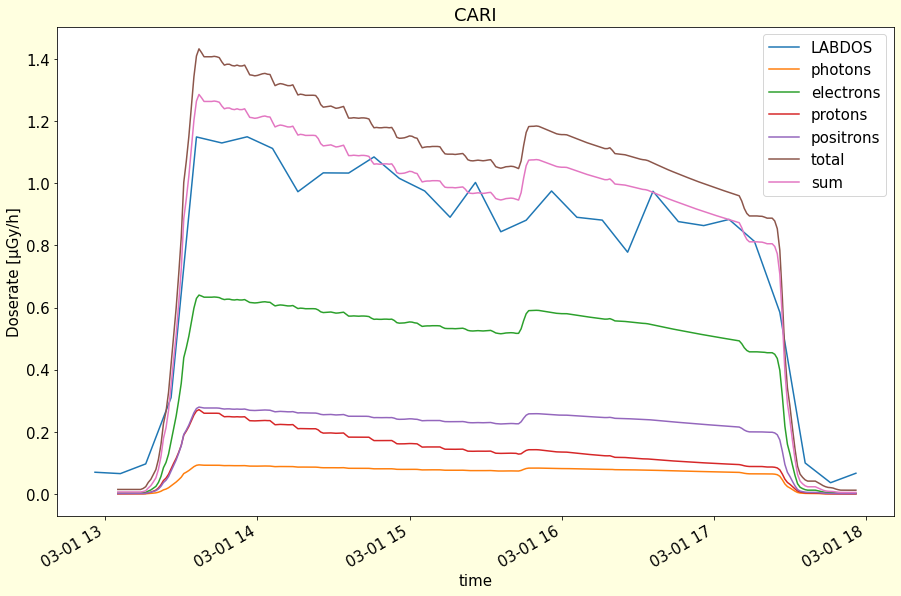

In [192]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rcc.index + timedelta(hours=1.1),rcc['dsi'], label='LABDOS')
#plt.plot(rc.index + timedelta(hours=1),rc['roll'], label='LABDOS')

cari_photons[4].plot(label='photons')
cari_electrons[4].plot(label='electrons')
cari_protons[4].plot(label='protons')
#cari_alphas[4].plot(label='alphas')
cari_positrons[4].plot(label='positrons')
#cari_neg_muons[4].plot(label='neg_muons')
cari_total[4].plot(label='total')
(cari_photons[4]+cari_electrons[4]+cari_protons[4]+cari_positrons[4]).plot(label='sum')
plt.ylabel('Doserate [µGy/h]')
plt.title('CARI')
plt.legend()

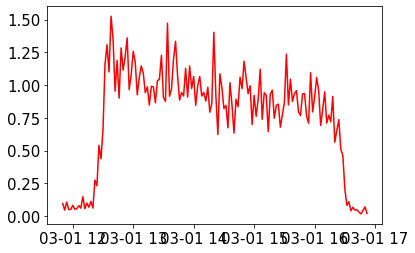

In [145]:
plt.plot(rcc.index,rcc['dsi'], color='red')


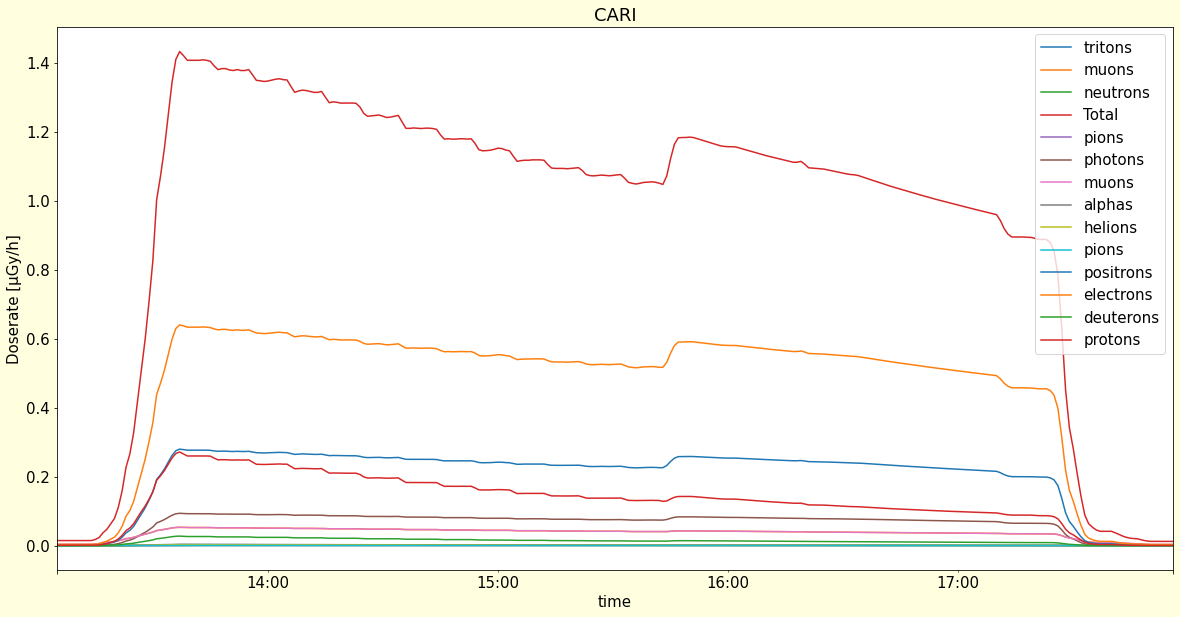

In [151]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


dto = '/storage/experiments/2023/0301_SA/0301_W62987/CARI/'


for fto in glob.iglob(dto + 'W62987_2f5ddba8_D*'): # generator, search immediate subdirectories 
    particles = fto.split('/')[-1].split('.')[-2].split('_')[-1]
    if (len(particles)>2):
        cari = pd.read_table(fto, delim_whitespace=True, skipfooter=3, skiprows=1, header=None, comment='*', engine='python')    
        #cari.reset_index(drop=True, inplace=True)
        cari['time'] = pd.to_datetime(dict(year=cari[6], month=cari[7], day=cari[8], hour=cari[9], minute=cari[10]))
        cari.set_index('time', drop=False, inplace=True)
        cari[4].plot(label=particles)
    

plt.ylabel('Doserate [µGy/h]')
plt.title('CARI')
plt.legend()

In [113]:
fto.split('/')[-1].split('.')[-2].split('_')[-1]

'tritons'

# Flight JED-VIE

In [16]:
fto = '/storage/experiments/2023/0301_SA/0312_W62988/'


## Load and plot data from LABDOS

In [17]:
print (fto)

l=[]
#l.extend(range(0,258))
#l.extend(range(0,260))
l.extend(range(0,505))

#df = pd.read_csv(fto+'/DATALOG.TXT', sep=',', header=None, names=l, comment='*', low_memory=False)
df = pd.read_csv(fto+'LABDOS01/0.TXT', sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
print('Loaded')

/storage/experiments/2023/0301_SA/0312_W62988/
Loaded


In [18]:
#SWITCH_ON_TIMES = ['2021-9-18 12:00', '2021-9-19 12:00', '2021-9-20 12:00', '2021-9-21 12:00', '2021-9-22 12:00', '2021-9-23 12:00', '2021-9-24 12:00', '2021-9-25 12:00', '2021-9-26 12:00', '2021-9-27 12:00', '2021-9-28 12:00', '2021-9-29 12:00', '2021-9-30 12:00']
SWITCH_ON_TIMES = ['2023-03-01 12:15']
SWITCH_ON_TIMES = ['2023-03-12 18:09']

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df.copy()
#rc = df.iloc[366870:378082,:].copy()
#rc = df.iloc[366683:378082,:].copy()
#rc = df.iloc[366714:378084,:].copy() 

run = 0
rc['run'] = np.nan

try:
    for x in rc.loc[rc[0]=='$DOS'].index:
        rc.loc[x,'run'] = SWITCH_ON_TIMES[run]
        run += 1
except:
    pass
rc['run'].fillna(method="ffill", inplace=True)

pd.set_option('display.max_rows', rc.shape[0]+1)
print(rc.loc[rc[0]=='$DOS'][[0,1,3, 'run', 'runtime']])
#print(rc.loc[rc[0]=='$AIRDOS'][[0,1, 'runtime']])
pd.set_option('display.max_rows', 10)

#!!!rc = rc.loc[rc[0]=='$HIST']
#rc = rc.iloc[949:]
rc = rc.iloc[3280:]

         0          1    3               run   runtime
0     $DOS  LABDOS01A  517  2023-03-12 18:09       NaN
905   $DOS  LABDOS01A  517  2023-03-12 18:09   7055.29
911   $DOS  LABDOS01A  517  2023-03-12 18:09     39.10
912   $DOS  LABDOS01A  517  2023-03-12 18:09     -0.00
917   $DOS  LABDOS01A  517  2023-03-12 18:09     31.32
922   $DOS  LABDOS01A  517  2023-03-12 18:09     31.34
924   $DOS  LABDOS01A  517  2023-03-12 18:09      7.98
929   $DOS  LABDOS01A  517  2023-03-12 18:09     31.34
948   $DOS  LABDOS01A  517  2023-03-12 18:09    140.39
3276  $DOS  LABDOS01A  517  2023-03-12 18:09  18120.60


In [19]:
rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)

In [20]:
rc

0     1         2    3  4      5      6       7  \
time                                                                           
2023-03-12 18:09:31.350  $HIST     3     31.35  429  0  23464  41049   553.0   
2023-03-12 18:09:39.150  $HIST     4     39.15  465  0  24094  40391   547.0   
2023-03-12 18:09:46.940  $HIST     5     46.94  474  0  23515  40958   550.0   
2023-03-12 18:09:54.750  $HIST     6     54.75  505  0  24525  39953   505.0   
2023-03-12 18:10:02.540  $HIST     7     62.54  452  5  24767  39650   612.0   
...                        ...   ...       ...  ... ..    ...    ...     ...   
2023-03-12 23:41:20.710  $HIST  2554  19940.71  479  0  17237  46717  1080.0   
2023-03-12 23:41:28.520  $HIST  2555  19948.52  451  2  17323  46667  1062.0   
2023-03-12 23:41:36.360  $HIST  2556  19956.36  462  0  17745  46297   996.0   
2023-03-12 23:41:44.170  $HIST  2557  19964.17  489  3  17317  46648  1048.0   
2023-03-12 23:41:51.980  $HIST  2558  19971.98  440  0  17280  46696  1085.0   

                           8    9  ...  499  500  501  502  503  504  runtime  \
time                               ...                                          
2023-03-12 18:09:31.350  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.79   
2023-03-12 18:09:39.150  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.80   
2023-03-12 18:09:46.940  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.79   
2023-03-12 18:09:54.750  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.81   
2023-03-12 18:10:02.540  3.0  2.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.79   
...                      ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
2023-03-12 23:41:20.710  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.81   
2023-03-12 23:41:28.520  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.81   
2023-03-12 23:41:36.360  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.84   
2023-03-12 23:41:44.170  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.81   
2023-03-12 23:41:51.980  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0    -7.81   

                          seconds               run                    time  
time                                                                         
2023-03-12 18:09:31.350     31.35  2023-03-12 18:09 2023-03-12 18:09:31.350  
2023-03-12 18:09:39.150     39.15  2023-03-12 18:09 2023-03-12 18:09:39.150  
2023-03-12 18:09:46.940     46.94  2023-03-12 18:09 2023-03-12 18:09:46.940  
2023-03-12 18:09:54.750     54.75  2023-03-12 18:09 2023-03-12 18:09:54.750  
2023-03-12 18:10:02.540     62.54  2023-03-12 18:09 2023-03-12 18:10:02.540  
...                           ...               ...                     ...  
2023-03-12 23:41:20.710  19940.71  2023-03-12 18:09 2023-03-12 23:41:20.710  
2023-03-12 23:41:28.520  19948.52  2023-03-12 18:09 2023-03-12 23:41:28.520  
2023-03-12 23:41:36.360  19956.36  2023-03-12 18:09 2023-03-12 23:41:36.360  
2023-03-12 23:41:44.170  19964.17  2023-03-12 18:09 2023-03-12 23:41:44.170  
2023-03-12 23:41:51.980  19971.98  2023-03-12 18:09 2023-03-12 23:41:51.980  

[2556 rows x 509 columns]

# Load and plot telemetry data

In [21]:
#ftt = glob.iglob(fto+"/*/*.csv") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/*.csv") # generator, search immediate subdirectories 
tele = pd.DataFrame()
for f in ftt:
    print(f)
    tele = pd.concat([tele, pd.read_csv(f)])
#tele

/storage/experiments/2023/0301_SA/0312_W62988/W62988_2f7fadd1.csv


Text(0, 0.5, 'Altitude a.s.l. [ft]')

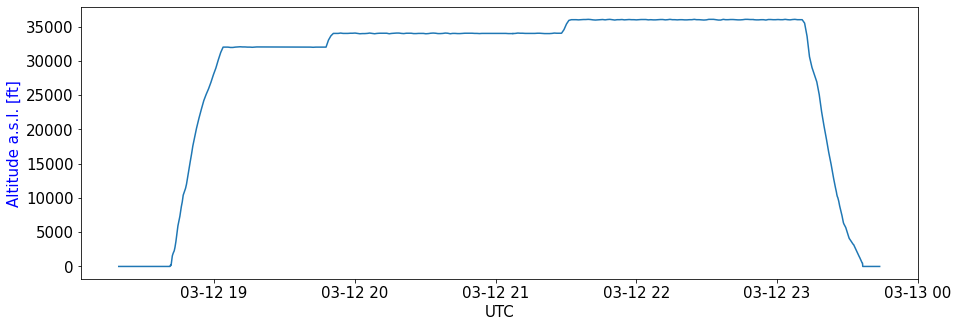

In [22]:
plt.figure(figsize=(15,5))

tele['time'] = pd.to_datetime(tele['UTC'], format='%Y-%m-%dT%H:%M:%SZ')
tele.set_index('time', inplace=True)
tele.sort_index(inplace=True)
plt.plot(tele['Altitude'])
plt.xlabel('UTC')
plt.ylabel('Altitude a.s.l. [ft]', color='blue')

In [23]:
tele

Timestamp                   UTC Callsign  \
time                                                             
2023-03-12 18:19:22  1678645162  2023-03-12T18:19:22Z  WZZ2988   
2023-03-12 18:21:42  1678645302  2023-03-12T18:21:42Z  WZZ2988   
2023-03-12 18:22:03  1678645323  2023-03-12T18:22:03Z  WZZ2988   
2023-03-12 18:22:26  1678645346  2023-03-12T18:22:26Z  WZZ2988   
2023-03-12 18:22:47  1678645367  2023-03-12T18:22:47Z  WZZ2988   
...                         ...                   ...      ...   
2023-03-12 23:42:53  1678664573  2023-03-12T23:42:53Z  WZZ2988   
2023-03-12 23:43:06  1678664586  2023-03-12T23:43:06Z  WZZ2988   
2023-03-12 23:43:12  1678664592  2023-03-12T23:43:12Z  WZZ2988   
2023-03-12 23:43:21  1678664601  2023-03-12T23:43:21Z  WZZ2988   
2023-03-12 23:43:47  1678664627  2023-03-12T23:43:47Z  WZZ2988   

                                Position  Altitude  Speed  Direction  
time                                                                  
2023-03-12 18:19:22  21.677376,39.141056         0      0        109  
2023-03-12 18:21:42  21.677481,39.140827         0      2         81  
2023-03-12 18:22:03  21.677458,39.140625         0      2         73  
2023-03-12 18:22:26  21.677364,39.140423         0      2         95  
2023-03-12 18:22:47  21.677328,39.140217         0      2        129  
...                                  ...       ...    ...        ...  
2023-03-12 23:42:53  48.120651,16.553862         0      4         25  
2023-03-12 23:43:06  48.120884,16.553701         0      7        329  
2023-03-12 23:43:12   48.12093,16.553461         0      5        300  
2023-03-12 23:43:21  48.121002,16.553246         0      3        298  
2023-03-12 23:43:47  48.120747,16.553913         0      1        295  

[549 rows x 7 columns]

# Combine AIRDOS and telemetry data

Text(0.5, 1.0, '/storage/experiments/2023/0301_SA/0312_W62988/')

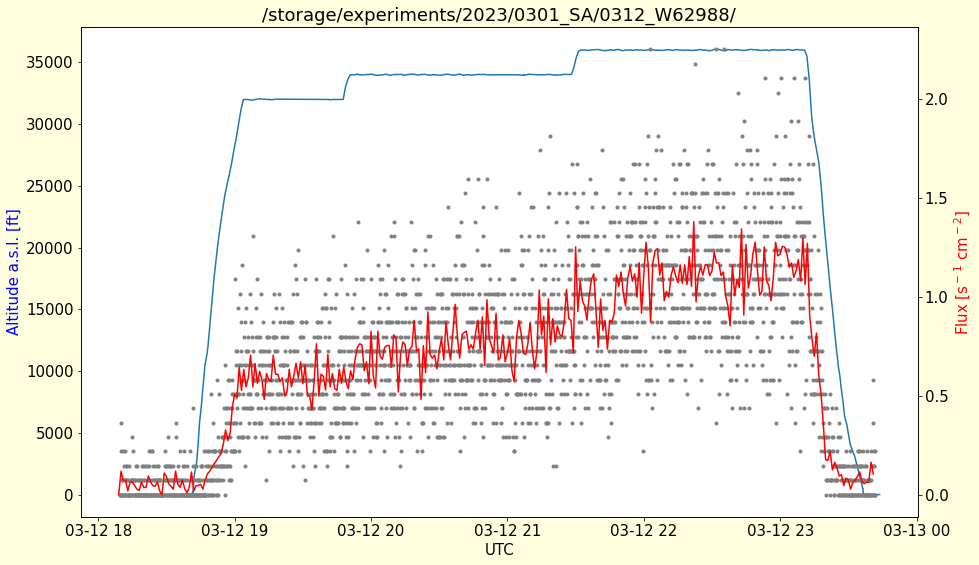

In [24]:
FIRST_CHANNEL = 8

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'])
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

#rc = rc.iloc[3286:]

plt.twinx()

rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

rc['sum'].plot(marker='.', linestyle='', color='gray')
rcc = rc.resample('1T').mean()
rcc['sum'].plot(color='red')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')
plt.title(fto)

#plt.ylim([0,30]) 


0.034 0.016


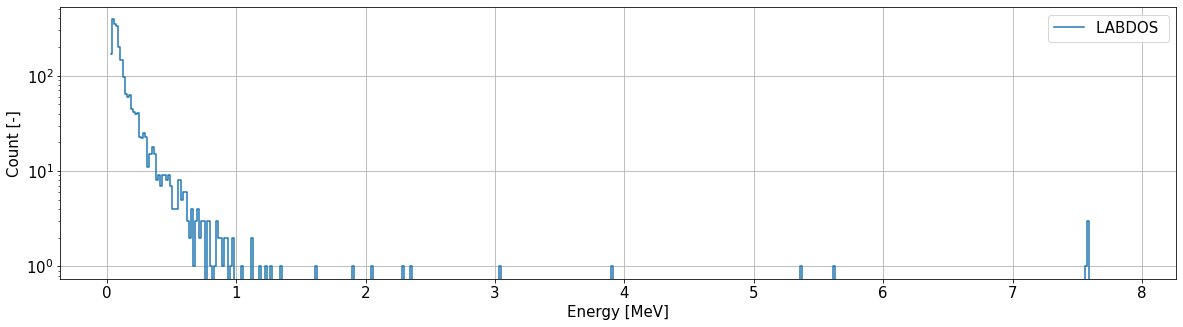

In [33]:
rc = data['EF']['rc']
ener = rc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS ', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

/tmp/ipykernel_1750/3006373546.py:16: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rcc = rc.loc['2023-03-12 19:00':'2023-03-12 23:00']


Text(0, 0.5, 'Flux [s$^-$$^1$ cm$^-$$^2$]')

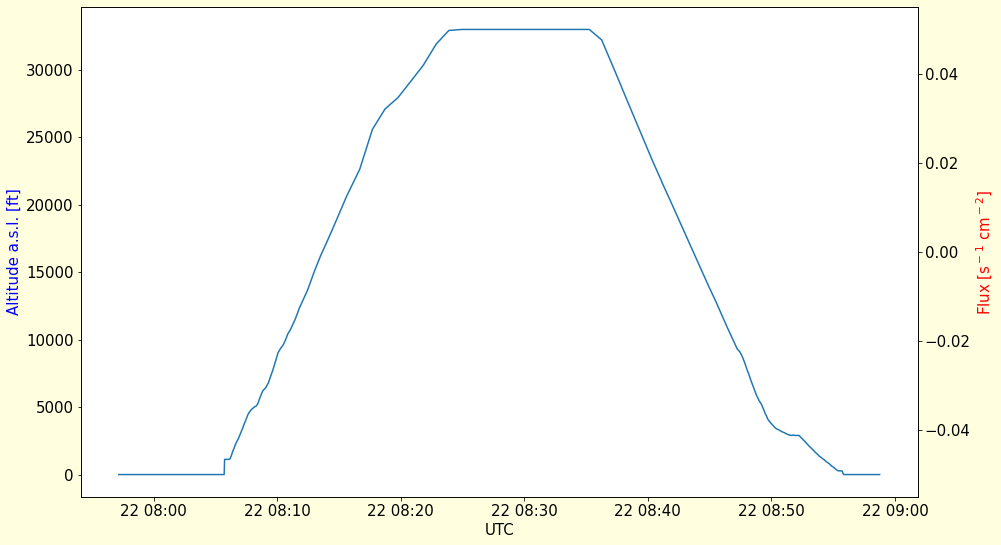

In [34]:
FIRST_CHANNEL = 8

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


plt.plot(tele['Altitude'])
# Set limits of plot for magnification
#plt.xlim(pd.Timestamp('2019-09-03'),pd.Timestamp('2019-09-7'))
#plt.xlim(pd.Timestamp('2021-06-8'),pd.Timestamp('2021-06-12'))
#plt.xlim(pd.Timestamp('2021-10-8'),pd.Timestamp('2021-11-5')) # SWA last measurement
#plt.xlim(pd.Timestamp('2021-9-15'),pd.Timestamp('2021-9-28')) # SWB last measurement
plt.ylabel('Altitude a.s.l. [ft]', color='blue')
plt.xlabel('UTC')

rcc = rc.loc['2023-03-12 19:00':'2023-03-12 23:00']

plt.twinx()

rcc['sum'] = rcc[range(FIRST_CHANNEL,500)].sum(axis=1)/6.88/2
#rc['sum'] = rc[range(FIRST_CHANNEL,500)].sum(axis=1)

rcc['sum'].plot(marker='.', linestyle='', color='gray')
rccc = rcc.resample('1T').mean()
rccc['sum'].plot(color='red')
plt.ylabel('Flux [s$^-$$^1$ cm$^-$$^2$]', color='red')

#plt.ylim([0,30]) 


0.034 0.016


/nix/store/rfi9x6m75kr73qkc1964i1hlb98bxa7d-python3-3.8.13-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


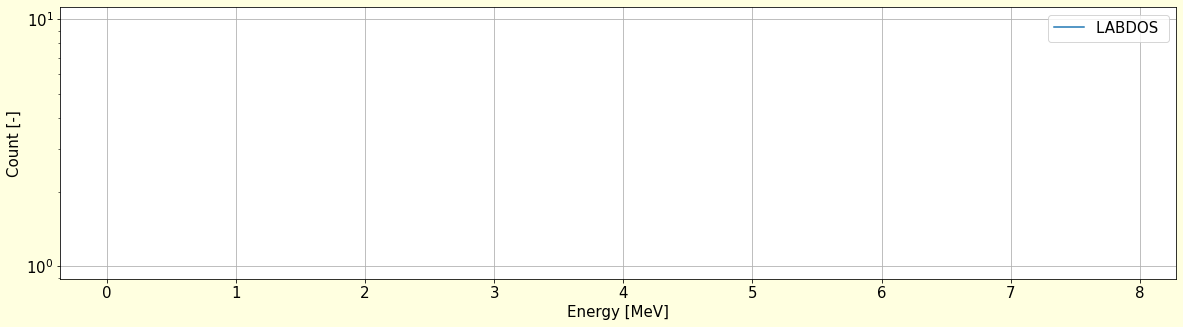

In [35]:
ener = rcc.iloc[:,FIRST_CHANNEL:500].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.016
coef3[0] = 0.034
#coef3[1] = 0.03
#coef3[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 
#0.034 MeV + ch * 0.016 MeV


print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS ', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 10, 1))
#plt.xlim(0,2)
#plt.vlines(0.511,1,1e4, color='red')

None

In [36]:
print('The first measurement', rcc.iloc[0,1])
print('The last measurement', rcc.iloc[-1,1])
measurement_duration = (int(rcc.iloc[-1,1]) - int(rcc.iloc[0,1])) * 6.88
flight_duration = rcc.iloc[-1,2] - rcc.iloc[0,2]
print('Begin', rcc.iloc[0,2], 's')
print('End', rcc.iloc[-1,2], 's')
print('Flight duration', round(flight_duration,2), 's')
print('Measurement duration', measurement_duration, 's')
deathtime_ratio = flight_duration / measurement_duration
print('Deathtime ratio', round(deathtime_ratio,2))

e3['total'] = e3['1']*e3['x']
depener = e3['total'].sum()*deathtime_ratio
print('Deposited Energy including deathtime', round(depener,2), 'MeV')
dose = (1e6*(1.602e-19 * depener*1e6)/0.1398e-3) 

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# 0.1398e-3 kg
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uGy/h

print('Dose in silicon', round(dose,2), 'µGy')


IndexError: index 0 is out of bounds for axis 0 with size 0

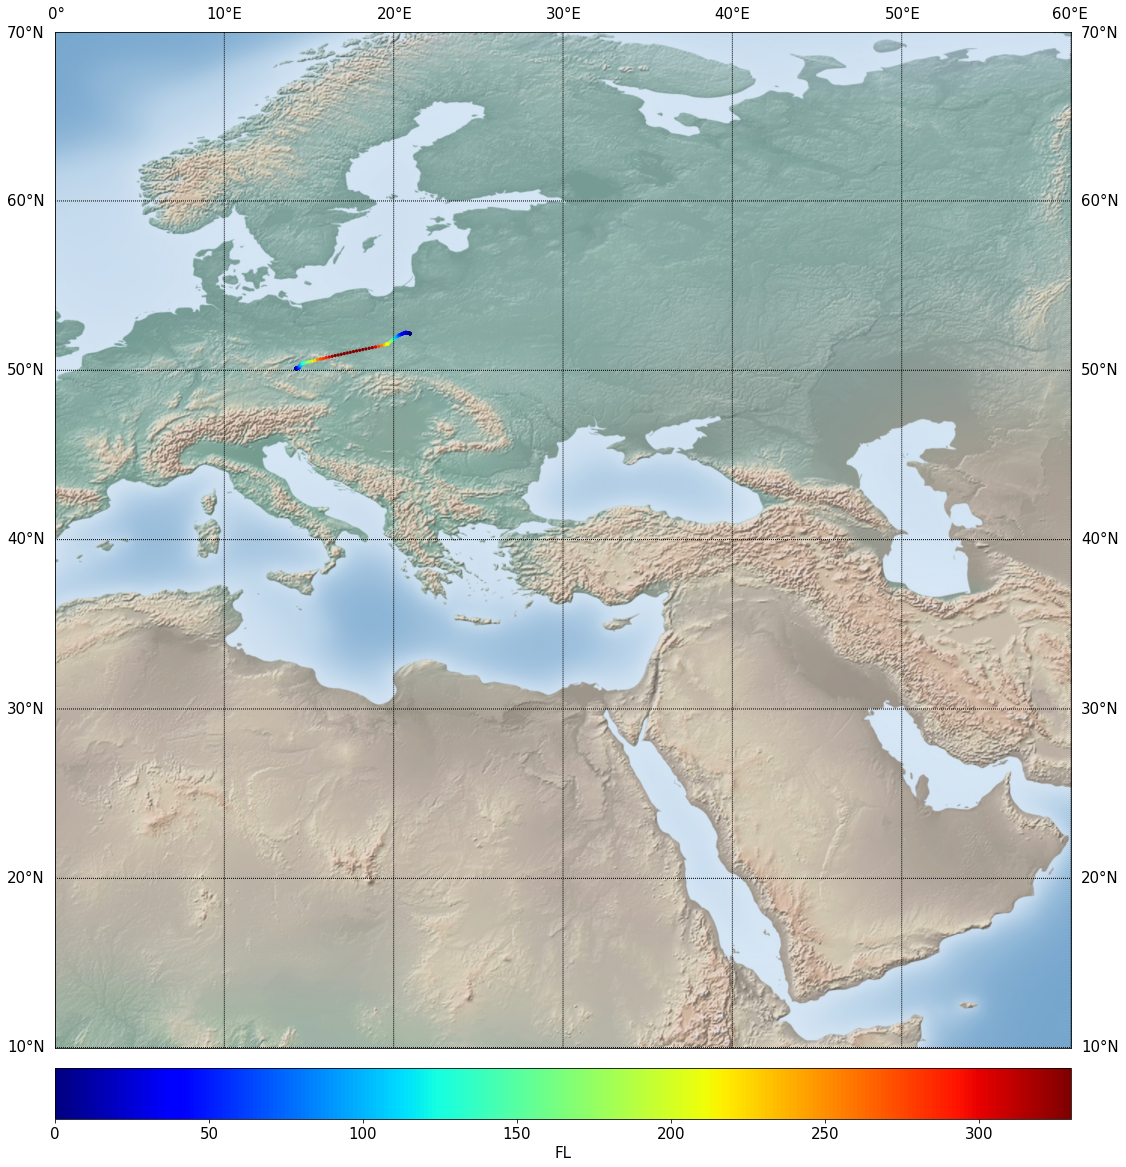

In [37]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import urllib, os

tele['lat'] = tele['Position'].str.split(',').str[0]
tele['lon'] = tele['Position'].str.split(',').str[1]
tele.lon = pd.to_numeric(tele.lon)
tele.lat = pd.to_numeric(tele.lat)
tele.Altitude = pd.to_numeric(tele.Altitude)


plt.figure(figsize=(20,20))
plt.tight_layout()

matplotlib.rcParams.update({'font.size': 15})

# create Basemap instance.
#m = Basemap(projection='kav7',lon_0=0)
m = Basemap(projection='cyl',lon_0=0, llcrnrlon=0,llcrnrlat=10,urcrnrlon=60,urcrnrlat=70)
#m = Basemap(projection='robin',lon_0=0)
#m = Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=85,projection='mill')


x, y = m(tele.lon.tolist(),tele.lat.tolist())
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,+90.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,1,0])
m.shadedrelief()

im1 = m.scatter(x,y,c=(tele.Altitude/100).tolist(),marker='.', s = 20, cmap='jet')
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('FL')

#plt.clim(0, 12500)  # limit for color axis
plt.show()                
